<a href="https://colab.research.google.com/github/Ashwin5412/Loan-Eligibility-Project/blob/main/Loan_Eligibility_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,ConfusionMatrixDisplay

In [ ]:
df=pd.read_csv(r"/content/loan-train.csv")
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:

df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [ ]:
df=df.dropna()

In [ ]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y


In [ ]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,480.000000,480.000000,480.000000,480.000000,480.000000
mean,5364.231250,1581.093583,144.735417,342.050000,0.854167
std,5668.251251,2617.692267,80.508164,65.212401,0.353307
min,150.000000,0.000000,9.000000,36.000000,0.000000
25%,2898.750000,0.000000,100.000000,360.000000,1.000000
50%,3859.000000,1084.500000,128.000000,360.000000,1.000000
75%,5852.500000,2253.250000,170.000000,360.000000,1.000000
max,81000.000000,33837.000000,600.000000,480.000000,1.000000


In [ ]:
df.isnull().sum()

,0
Loan_ID,0
Gender,0
Married,0
Dependents,0
Education,0
Self_Employed,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,0


In [ ]:
df=df.drop('Loan_ID',axis=1)
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y


In [ ]:
df['Gender']=df['Gender'].apply(lambda x:1 if x=='Male' else 0)
df['Education']=df['Education'].apply(lambda x:1 if x=='Graduate' else 0)
df['Self_Employed']=df['Self_Employed'].apply(lambda x:1 if x=='Yes' else 0)
df['Property_Area']=df['Property_Area'].apply(lambda x:1 if x=='Urban' else 0)
df['Loan_Status']=df['Loan_Status'].apply(lambda x:1 if x=='Y' else 0)
df['Married']=df['Married'].apply(lambda x:1 if x=='Yes' else 0)
df['Dependents'] = df['Dependents'].replace('3+', '3')
df['Dependents'] = pd.to_numeric(df['Dependents'], errors='coerce')
df.head(250)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,1,1
3,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,1,1
4,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,1,1
5,1,1,2,1,1,5417,4196.0,267.0,360.0,1.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
310,0,0,0,1,0,2917,0.0,84.0,360.0,1.0,0,1
311,1,0,0,0,0,2927,2405.0,111.0,360.0,1.0,0,1
312,0,0,0,1,0,2507,0.0,56.0,360.0,1.0,0,1
315,1,1,1,0,0,3399,1640.0,111.0,180.0,1.0,1,1


In [ ]:
x=df.drop('Loan_Status',axis=1)
y=df['Loan_Status']

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [ ]:
model=LogisticRegression(max_iter=1000)
model.fit(x_train,y_train)

LogisticRegression(max_iter=1000)

In [ ]:
print("Accuracy:",model.score(x_train,y_train))

Accuracy: 0.8095238095238095


In [ ]:
y_pred=model.predict(x_test)

In [ ]:
print("Accuracy:",accuracy_score(y_pred,y_test))

Accuracy: 0.7986111111111112


In [ ]:
# Try this version of the model
rf_model = RandomForestClassifier(n_estimators=100, max_depth=5, min_samples_leaf=5, random_state=42)
rf_model.fit(x_train, y_train)

print("New Training Accuracy:", rf_model.score(x_train, y_train))
print("New Testing Accuracy:", rf_model.score(x_test, y_test))

New Training Accuracy: 0.8125
New Testing Accuracy: 0.7986111111111112


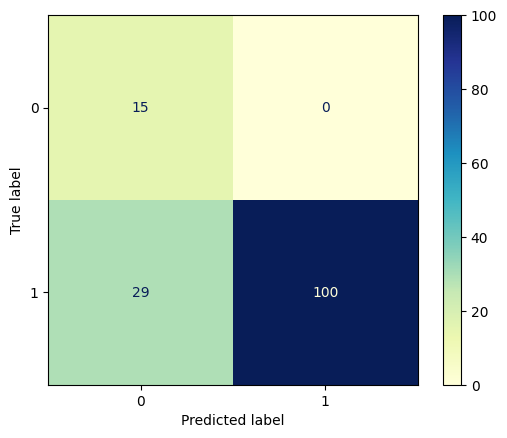

In [ ]:
cm=confusion_matrix(y_pred,y_test)
disp=ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='YlGnBu')

In [ ]:

real_time_data = pd.DataFrame({
    'Gender': [1, 0, 1, 1, 0],              # 1=Male, 0=Female
    'Married': [1, 1, 0, 1, 0],             # 1=Yes, 0=No
    'Dependents': [2, 0, 0, 3, 1],          # Number of dependents
    'Education': [1, 1, 1, 0, 1],           # 1=Graduate, 0=Not Graduate
    'Self_Employed': [0, 0, 0, 1, 0],       # 1=Yes, 0=No
    'ApplicantIncome': [8000, 2000, 4000, 2500, 4500],
    'CoapplicantIncome': [3000, 0, 0, 0, 1500],
    'LoanAmount': [200, 50, 100, 150, 120],
    'Loan_Amount_Term': [360, 360, 360, 180, 360],
    'Credit_History': [1.0, 0.0, 1.0, 0.0, 1.0], # 1.0 is the most important!
    'Property_Area': [1, 0, 2, 1, 0]        # Urban/Rural/Semiurban codes
})


real_time_data = real_time_data[x_train.columns]

real_predictions = rf_model.predict(real_time_data)
print("Real Time Prediction:",real_predictions)

Real Time Prediction: [1 0 1 0 1]
